In [27]:
from models.SklearnClassifier import SklearnClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import utils
import time

In [28]:
# Load the feature matrix and labels for doc2vec
X = utils.get_feature_matrix('../data/doc2vec.npy')
y = utils.get_feature_matrix('../data/authors.npy')

# Scale the feature matrix
X = utils.scale_feature_matrix(X)

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Init the classifier
lr_classifier = SklearnClassifier(LogisticRegression, C=1.0, n_jobs=-1, max_iter=10000)

In [31]:
# Train the classifier
start = time.time()
lr_classifier.train(X_train, y_train)
print('Training time: ', time.time() - start)

Training time:  27.376123905181885


In [32]:
# Evaluate the test set
lr_classifier.evaluate(X_test, y_test, top_k=3)

{'Precision': 0.6520555413333934,
 'Recall': 0.6482568173973076,
 'F1': 0.6491008585817268,
 'Accuracy': 0.6482568173973076,
 'Top-k Accuracy': 0.8840179496030376}

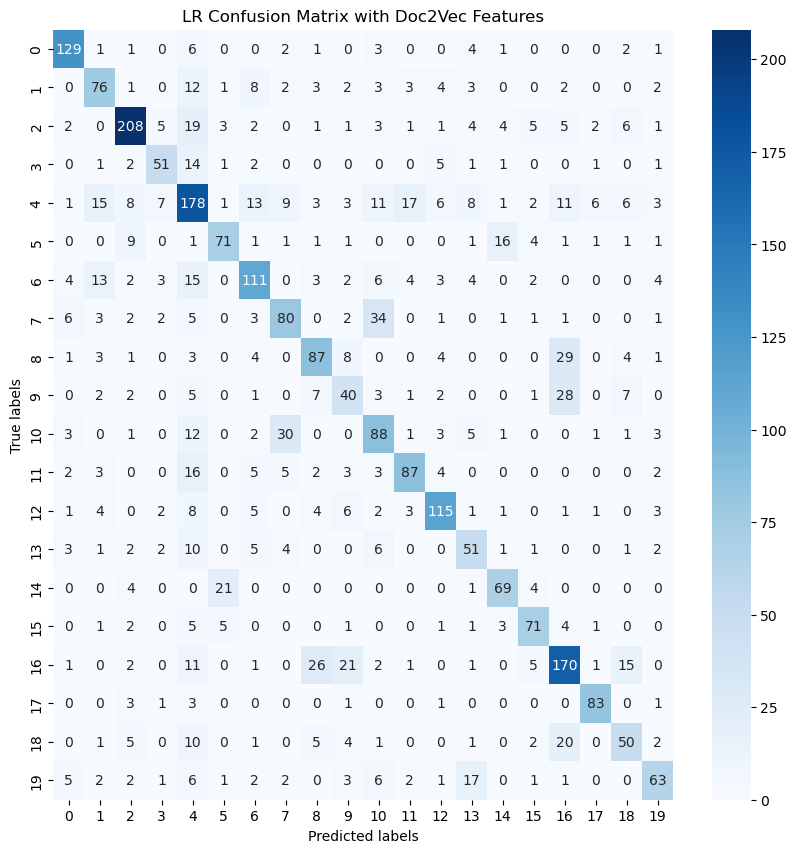

In [33]:
# Get confusion matrix
lr_classifier.get_confusion_matrix(X_test, y_test, 'LR Confusion Matrix with Doc2Vec Features')

In [34]:
# Load the BERT feature matrix and labels
X = utils.get_feature_matrix('../data/bert.npy')
y = utils.get_feature_matrix('../data/authors.npy')

# No need to scale the BERT features

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Init the classifier
lr_classifier = SklearnClassifier(LogisticRegression, C=1.0, n_jobs=-1, max_iter=10000)

In [37]:
# Train the classifier
start = time.time()
lr_classifier.train(X_train, y_train)
print('Training time: ', time.time() - start)

Training time:  112.45505166053772


In [38]:
# Evaluate the test set
lr_classifier.evaluate(X_test, y_test, top_k=3)

{'Precision': 0.8172753935572002,
 'Recall': 0.8146358301691405,
 'F1': 0.8156111413077399,
 'Accuracy': 0.8146358301691405,
 'Top-k Accuracy': 0.9523645150155333}

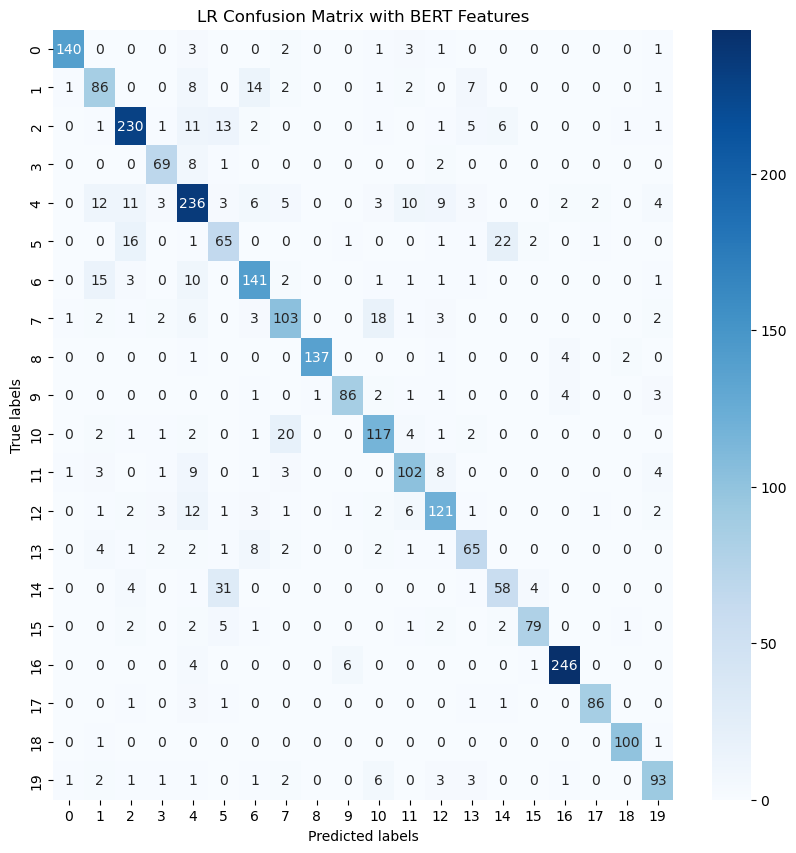

In [39]:
# Get confusion matrix
lr_classifier.get_confusion_matrix(X_test, y_test, 'LR Confusion Matrix with BERT Features')